## Python Implementation : Support Ventor Machine ( SVM ) 

Business Case : To find out targets based on given features whether the loan will get approved or not. 

In [129]:
# Import all relevant libraries. 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [130]:
data = pd.read_csv('loan_approved.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## EXPLORATORY DATA ANALYSIS

In [131]:
data.head

<bound method NDFrame.head of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849            

In [132]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

In [133]:
data.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [135]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [136]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [137]:
# For categorical information

data.describe(include='O')


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

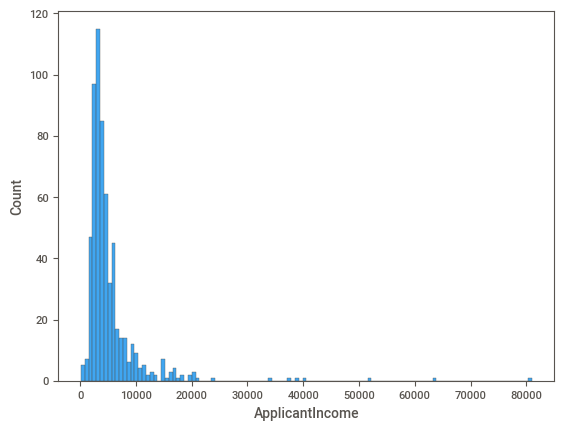

In [138]:
sns.histplot(x='ApplicantIncome',data=data)

## Exploratory Data Analysis

Univariate Analysis

In [139]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html('myreport.html')

                                             |                                             | [  0%]   00:00 ->…

Report myreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


<Axes: xlabel='Gender', ylabel='count'>

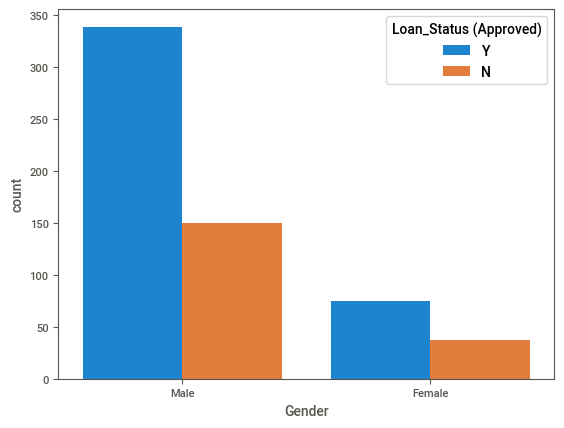

In [140]:
sns.countplot(x =data['Gender'],hue = data['Loan_Status (Approved)'])

## BIVARIATE ANALYSIS

Exploratory Data Analysis can be done by a single command from module sweetviz . 
import sweetviz as sv
report = sv.analyze(data)
report.show_html ("myreport.html")

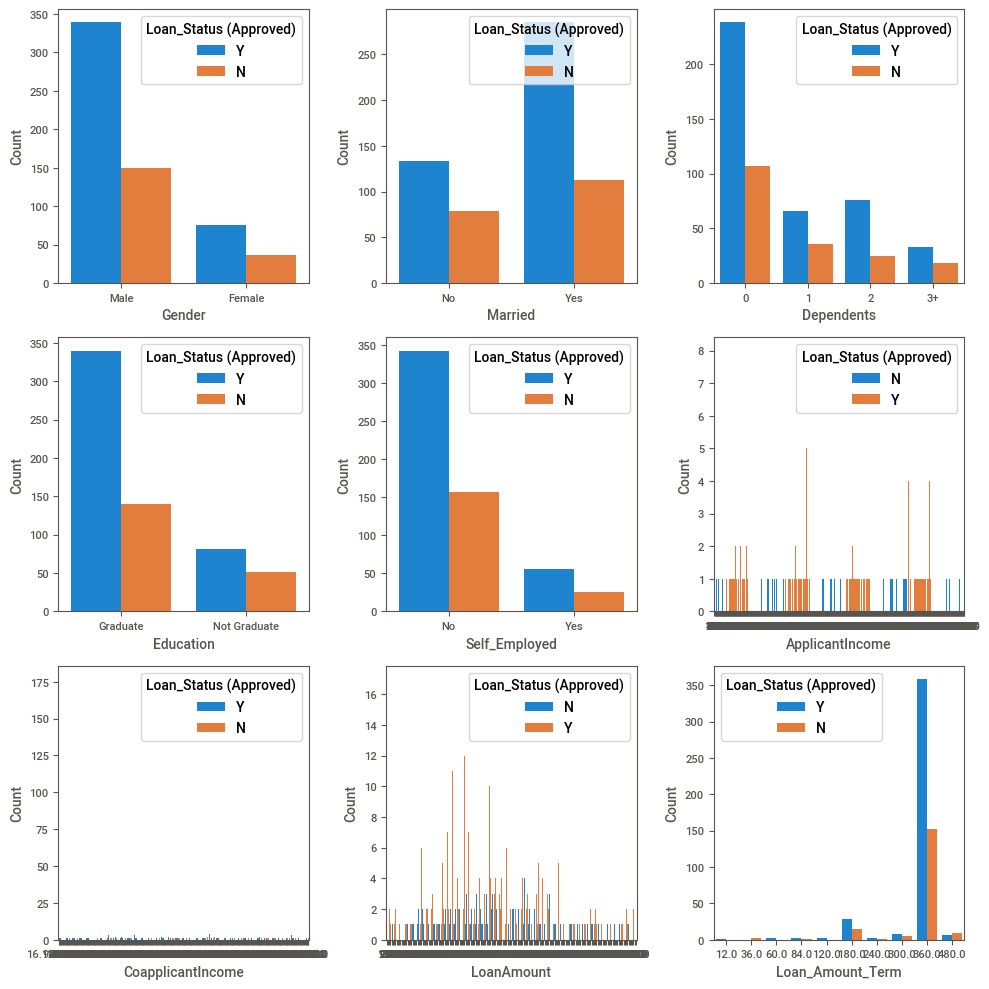

In [141]:
plt.figure(figsize=(10,10))
plot = 1
for i in data.drop('Loan_ID',axis = 1):
    if plot <=9:
        ax = plt.subplot(3,3,plot)
        sns.countplot(x=data[i],hue = data['Loan_Status (Approved)'])
        plt.xlabel(i,fontsize=10)
        plt.ylabel('Count',fontsize=10)
    plot += 1
plt.tight_layout()
    

## Preprocessing the Data

In [142]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

## Data Cleaning : Most important feature with the ML Model

In [143]:
# Missing values handling

data.isnull().sum()/len(data)*100

Loan_ID                   0.000000
Gender                    2.117264
Married                   0.488599
Dependents                2.442997
Education                 0.000000
Self_Employed             5.211726
ApplicantIncome           0.000000
CoapplicantIncome         0.000000
LoanAmount                3.583062
Loan_Amount_Term          2.280130
Credit_History            8.143322
Property_Area             0.000000
Loan_Status (Approved)    0.000000
dtype: float64

In [144]:
# Hadnling missing values of Gender Column
data['Gender'].mode()  # Categorical data is replaved with Mode value. 

0    Male
Name: Gender, dtype: object

Mean / Median - Continuous Data - Mean chosen when normal distribution and median in a skewed data. 
Mode - Catgorical Data 

In [145]:
data.loc[data['Gender'].isnull()==True,'Gender']="Male"



In [146]:
data.isnull().sum()

Loan_ID                    0
Gender                     0
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [147]:
data['Gender'].isnull().sum()

0

In [148]:
data['Married'].isnull().sum()

3

<Axes: xlabel='Married', ylabel='Count'>

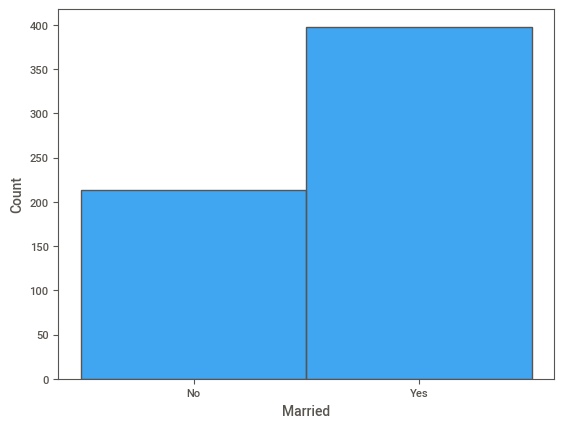

In [149]:
sns.histplot(x='Married',data =data)

In [150]:
# Replacing Married with Mode value. 

data['Married'].mode()

0    Yes
Name: Married, dtype: object

In [151]:
# Replacing missing value with the mode value from the Married Column. 

data.loc[data['Married'].isnull()==True,'Married']="Yes"

In [152]:
data['Married'].isnull().sum()

0

In [153]:
data["Dependents"].isnull().sum()

15

In [154]:
data['Dependents'].mode()

0    0
Name: Dependents, dtype: object

In [155]:
data.loc[data['Dependents'].isnull()==True,'Dependents']=0
data['Dependents'].isnull().sum()

0

<Axes: xlabel='Self_Employed', ylabel='Count'>

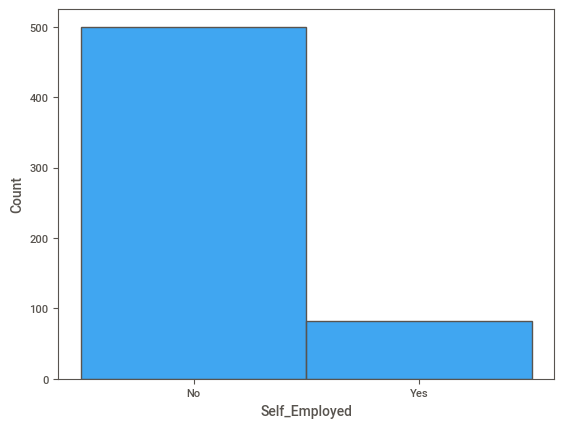

In [156]:
sns.histplot(x='Self_Employed',data=data)

In [157]:
data['Self_Employed'].isnull().sum()

32

In [158]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [159]:
data.loc[data['Self_Employed'].isnull()==True,'Self_Employed']='No'
data['Self_Employed'].isnull().sum()

0

In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [161]:
data['Loan_Amount_Term'].isnull().sum()

14

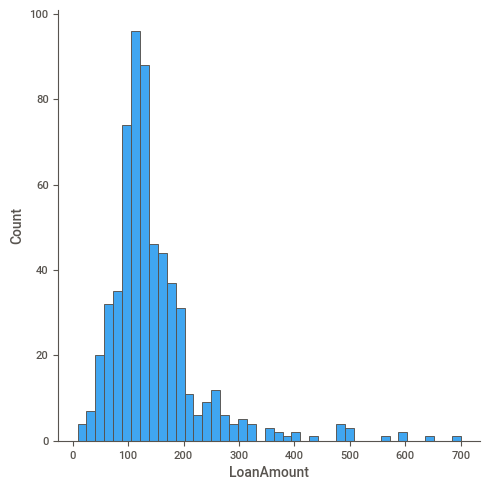

In [162]:
sns.displot(x=data['LoanAmount'])

# A positively skewed graph. Need to take mediam in missing value here. 


In [163]:
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=data['LoanAmount'].median()

In [164]:
data['LoanAmount'].isnull().sum()

0

<Axes: ylabel='Density'>

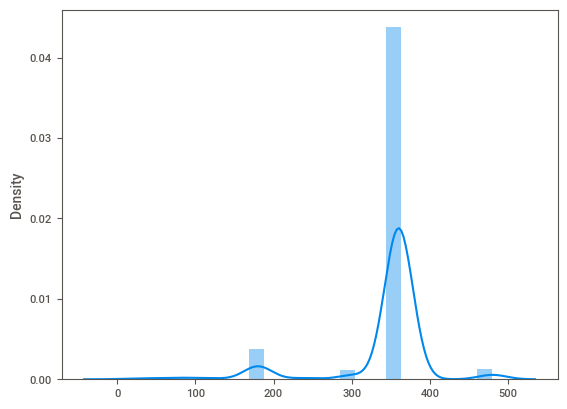

In [165]:
sns.distplot(x=data['Loan_Amount_Term'],kde=True)

In [166]:
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=data['Loan_Amount_Term'].median()



In [167]:
data['Loan_Amount_Term'].isnull().sum()

0

In [168]:
data["Credit_History"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
609    1.0
610    1.0
611    1.0
612    1.0
613    0.0
Name: Credit_History, Length: 614, dtype: float64

<Axes: ylabel='Density'>

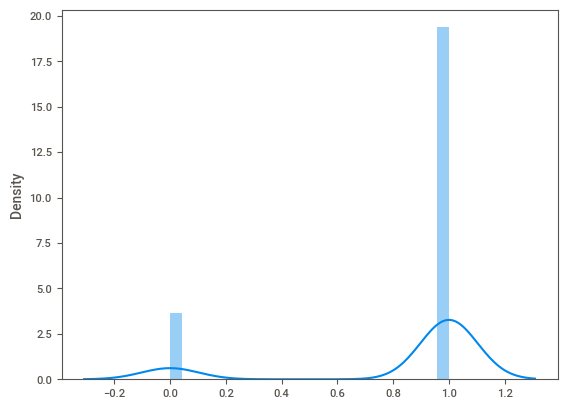

In [169]:
sns.distplot(x=data['Credit_History'],kde=True)

In [170]:
data.loc[data['Credit_History'].isnull()==True,'Credit_History']= 1.0

data['Credit_History'].isnull().sum()


0

In [171]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status (Approved)'],
      dtype='object')

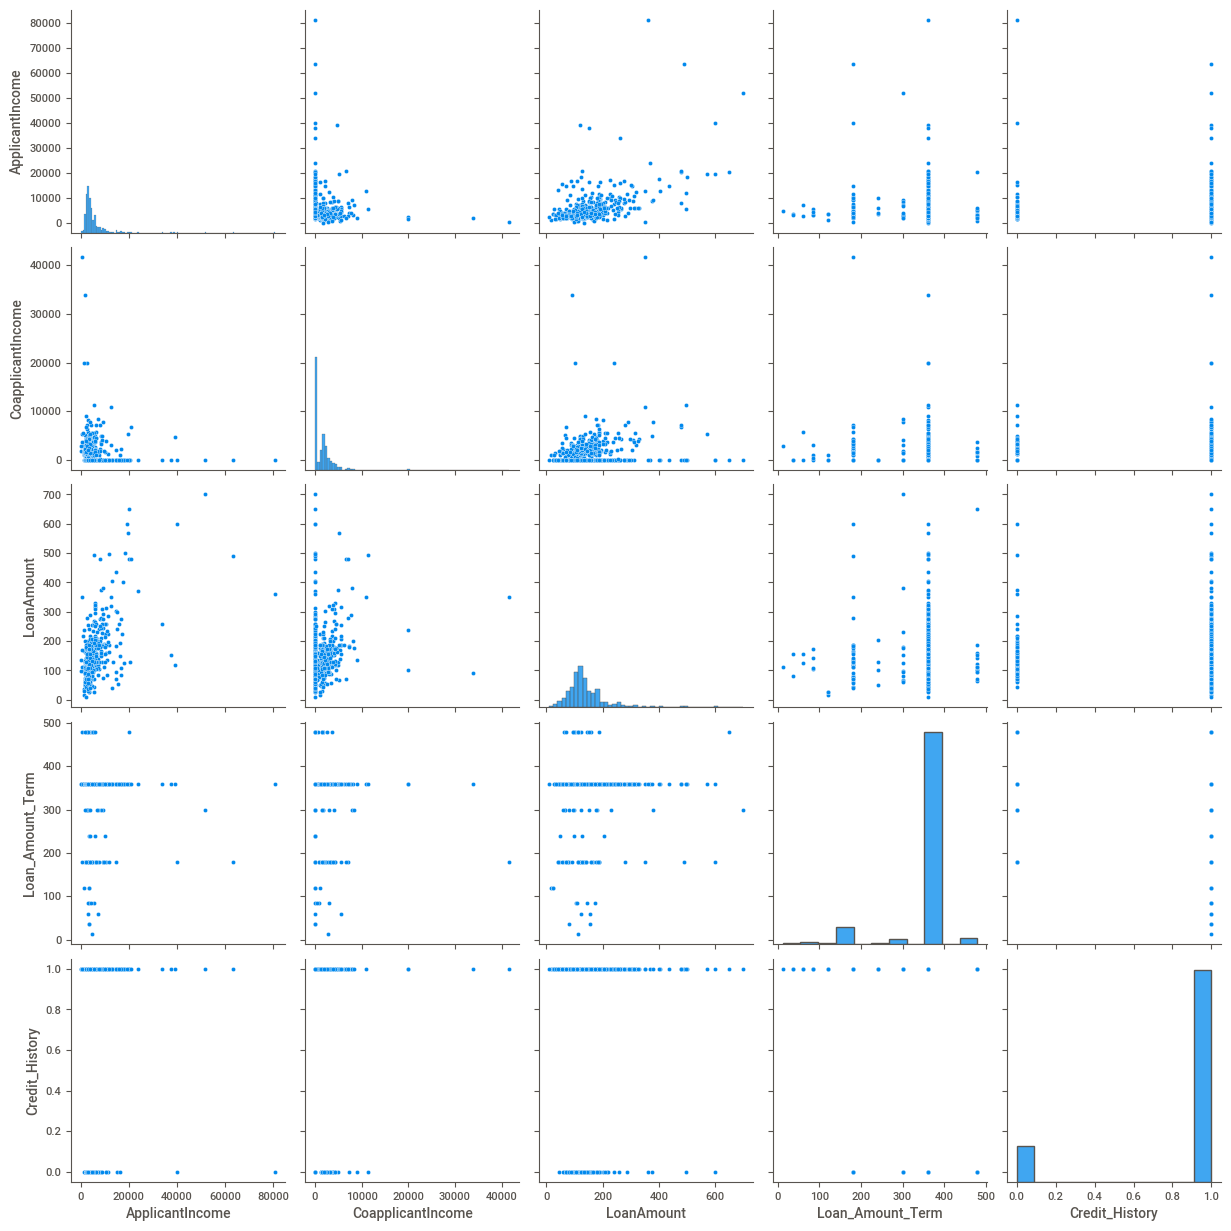

In [172]:
sns.pairplot(data=data)

## Identifying the Outliers 

<Axes: xlabel='ApplicantIncome'>

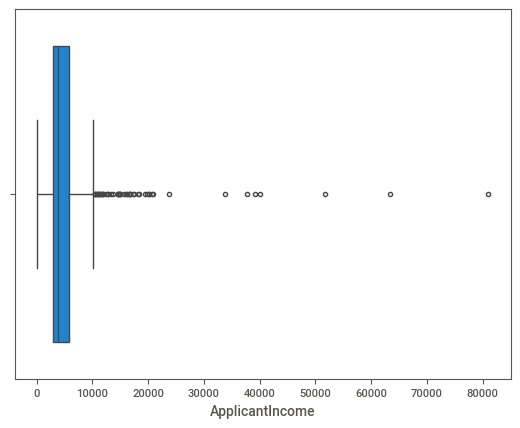

In [173]:
sns.boxplot(x=data.ApplicantIncome)

In [174]:
num_col = data.select_dtypes(include =['int64','float64'])
num_col

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


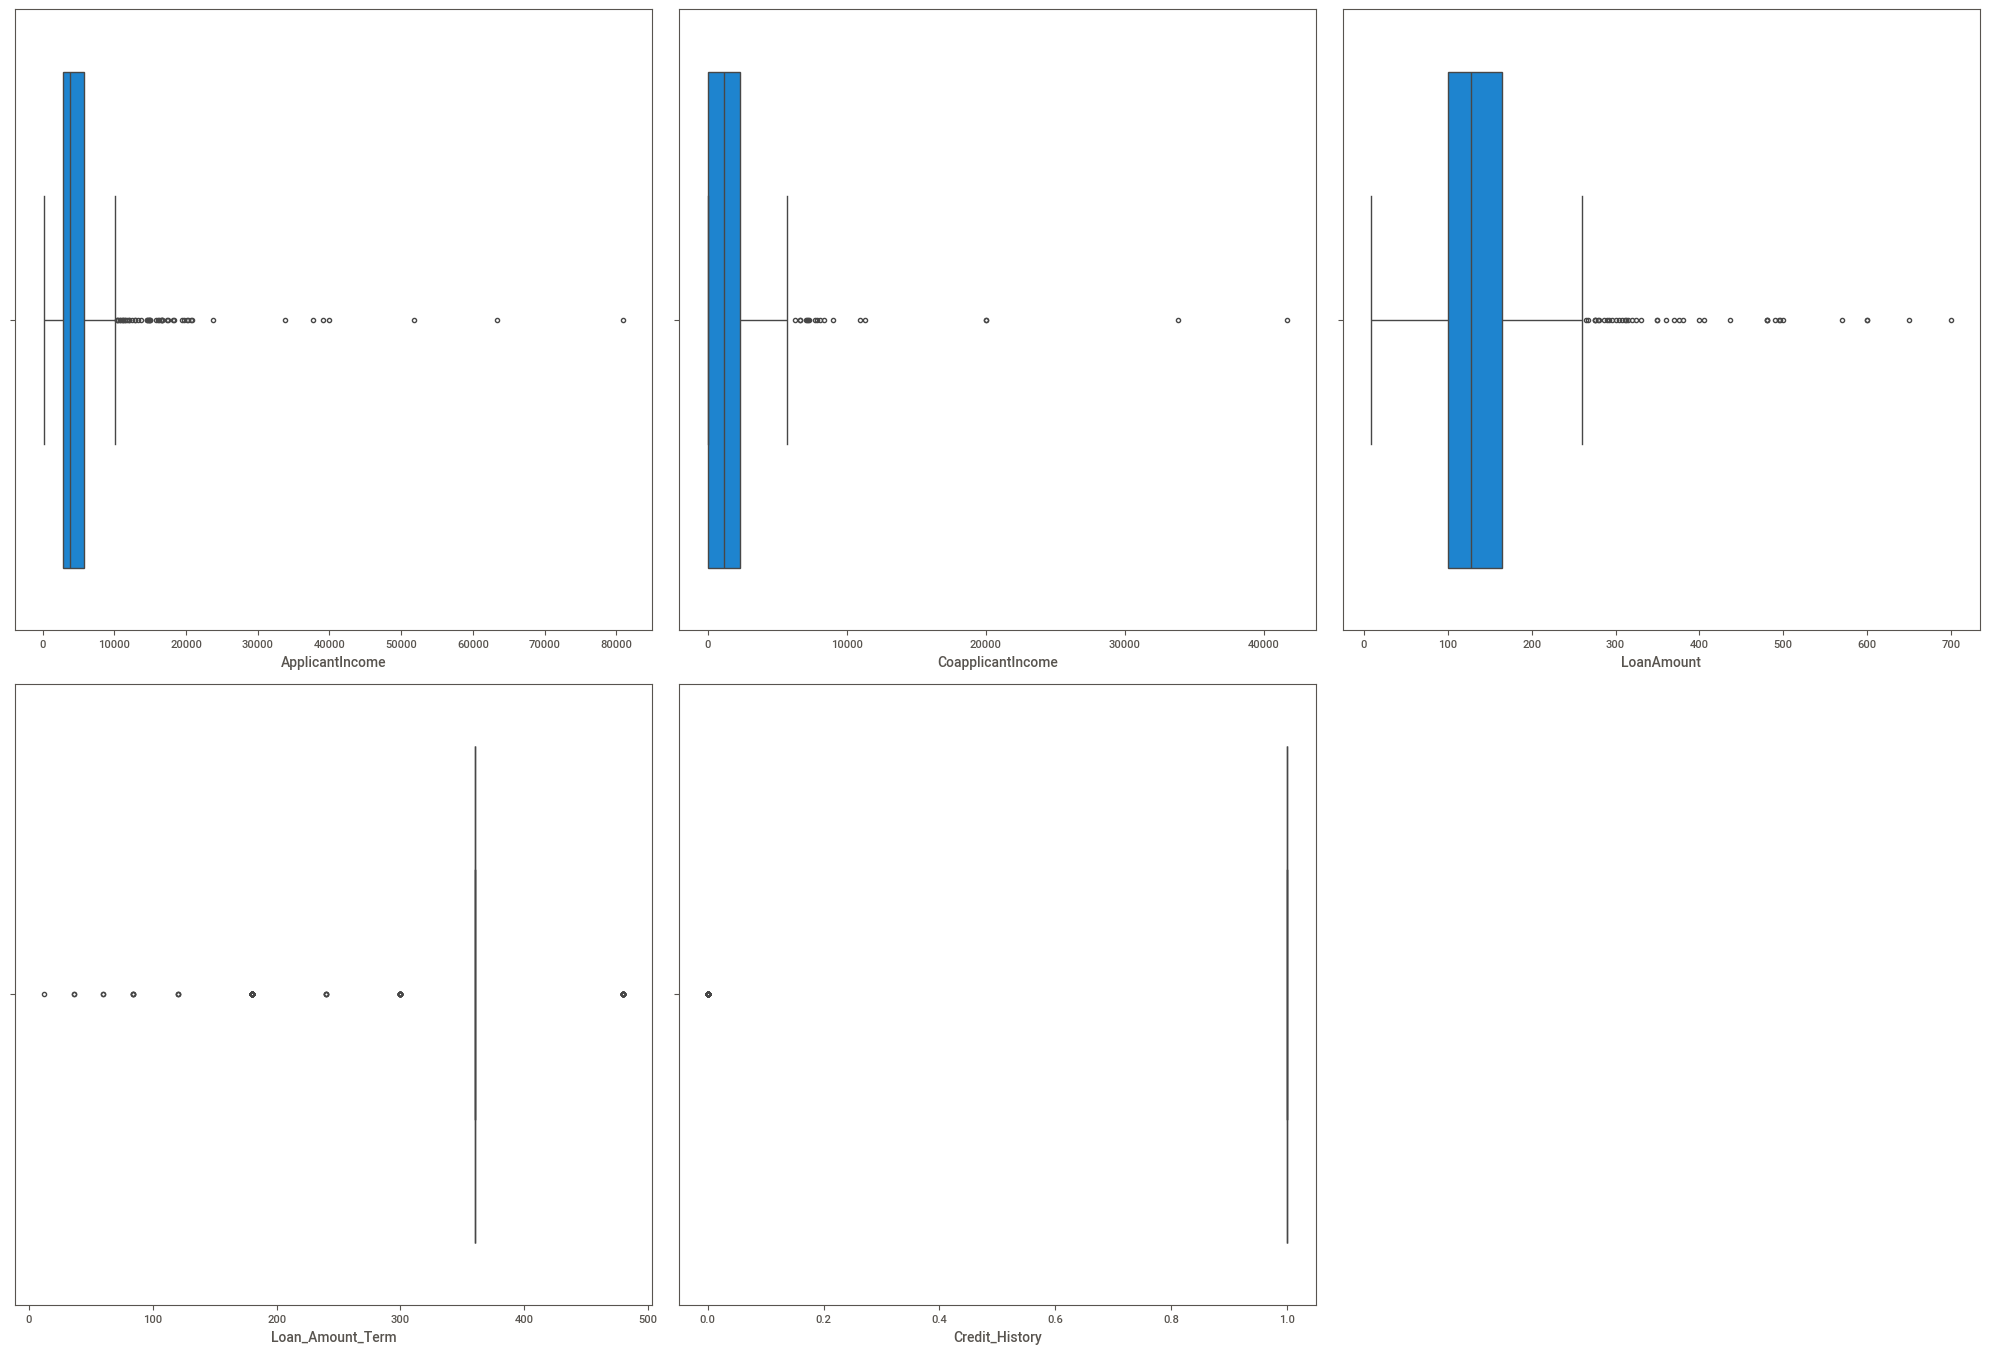

In [175]:
# checking the outliers

plt.figure(figsize=(20,20),facecolor = 'white')
plot = 1

for columns in num_col:
    if plot<=5:
        ax = plt.subplot(3,3,plot)
        sns.boxplot(x=data[columns])
        plt.xlabel(columns, fontsize=10)
    plot +=1

plt.tight_layout()
        

Outliers : by Mode and Median. Or by scaling. 

## Standard Scaler - [3,3] > x-mean / sigma ( normally standard distribution )  >> where data is normally distributed

## Min max scaler - [0,1] >> (x-xmin/xmax-xmin >>> whne data is not normally distributed

In [176]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

In [177]:
# Sacling the data to take care of outliers. 

data[['ApplicantIncome','CoapplicantIncome','LoanAmount']] = sc.fit_transform(data[['ApplicantIncome','CoapplicantIncome','LoanAmount']])


In [178]:
data[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.070489,0.000000,0.172214
1,0.054830,0.036192,0.172214
2,0.035250,0.000000,0.082489
3,0.030093,0.056592,0.160637
4,0.072356,0.000000,0.191027
...,...,...,...
609,0.034014,0.000000,0.089725
610,0.048930,0.000000,0.044863
611,0.097984,0.005760,0.353111
612,0.091936,0.000000,0.257598


## Taking care of Categorical Data as well 
## Start with the check for Nominal or Ordinal Data inside categorical marking

# Ordinal Data : We will  Label Encoding Pattern
# Nominal Data : We will have Onehard Encoding

In [179]:
data2 = data.copy()
data2

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Urban,Y


In [180]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  614 non-null    object 
 2   Married                 614 non-null    object 
 3   Dependents              614 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           614 non-null    object 
 6   ApplicantIncome         614 non-null    float64
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              614 non-null    float64
 9   Loan_Amount_Term        614 non-null    float64
 10  Credit_History          614 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [181]:
df1 = pd.get_dummies(data2['Gender'],dtype = 'int', prefix = 'Gender',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Gender',axis = 1)



In [182]:
data2.info()
data2['Gender_Male']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Married                 614 non-null    object 
 2   Dependents              614 non-null    object 
 3   Education               614 non-null    object 
 4   Self_Employed           614 non-null    object 
 5   ApplicantIncome         614 non-null    float64
 6   CoapplicantIncome       614 non-null    float64
 7   LoanAmount              614 non-null    float64
 8   Loan_Amount_Term        614 non-null    float64
 9   Credit_History          614 non-null    float64
 10  Property_Area           614 non-null    object 
 11  Loan_Status (Approved)  614 non-null    object 
 12  Gender_Male             614 non-null    int32  
dtypes: float64(5), int32(1), object(7)
memory usage: 60.1+ KB


0      1
1      1
2      1
3      1
4      1
      ..
609    0
610    1
611    1
612    1
613    0
Name: Gender_Male, Length: 614, dtype: int32

In [183]:
df1 = pd.get_dummies(data2['Married'],dtype = 'int', prefix = 'Married',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Married',axis = 1)
data2

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Gender_Male,Married_Yes
0,LP001002,0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y,1,0
1,LP001003,1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N,1,1
2,LP001005,0,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y,1,1
3,LP001006,0,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y,1,1
4,LP001008,0,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Rural,Y,0,0
610,LP002979,3+,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Rural,Y,1,1
611,LP002983,1,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Urban,Y,1,1
612,LP002984,2,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Urban,Y,1,1


In [184]:
df1 = pd.get_dummies(data2['Dependents'],dtype = 'int', prefix = 'Dependents',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Dependents',axis = 1)
data2

,Loan_ID,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Urban,Y,1,0,1,0,0,0
1,LP001003,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,Rural,N,1,1,0,1,0,0
2,LP001005,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Urban,Y,1,1,1,0,0,0
3,LP001006,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Urban,Y,1,1,1,0,0,0
4,LP001008,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Urban,Y,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Rural,Y,0,0,1,0,0,0
610,LP002979,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Rural,Y,1,1,0,0,0,1
611,LP002983,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Urban,Y,1,1,0,1,0,0
612,LP002984,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Urban,Y,1,1,0,0,1,0


In [185]:
df1 = pd.get_dummies(data2['Property_Area'],dtype = 'int', prefix = 'Property_Area',drop_first=True)
data2 = pd.concat([data2,df1],axis=1).drop('Property_Area',axis = 1)
data2

,Loan_ID,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,1,0,0,0,0,1
1,LP001003,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,1,0,0,0,0
2,LP001005,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,1,0,0,0,0,1
3,LP001006,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,0,0,0,1
4,LP001008,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,1,0,0,0,0,0
610,LP002979,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,1,0,0
611,LP002983,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,1,0,0,0,1
612,LP002984,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,0,1


## Feature Selection 

In [186]:
## We start by removing the unwanted columsn here . 
## Example LOAN ID where we just have to remove because of all complete unique IDs which 
## have no dependencies with those kind of datas. 

data2.drop('Loan_ID',axis =1 , inplace = True)


In [187]:
# Co-relation between the variables here

df2 = data2[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

<Axes: >

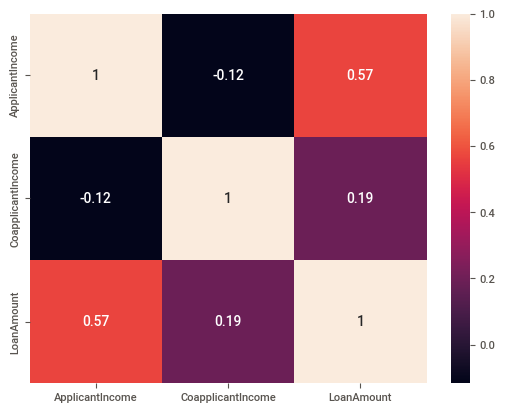

In [188]:
sns.heatmap(df2.corr(),annot=True)


# No multicollinerality is observed . So no strong co-relation. 
# so we are taking all relevant features for our model.

In [189]:
data2['Loan_Status (Approved)'] = data['Loan_Status (Approved)']
data2

,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status (Approved),Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,Graduate,No,0.070489,0.000000,0.172214,360.0,1.0,Y,1,0,1,0,0,0,0,1
1,Graduate,No,0.054830,0.036192,0.172214,360.0,1.0,N,1,1,0,1,0,0,0,0
2,Graduate,Yes,0.035250,0.000000,0.082489,360.0,1.0,Y,1,1,1,0,0,0,0,1
3,Not Graduate,No,0.030093,0.056592,0.160637,360.0,1.0,Y,1,1,1,0,0,0,0,1
4,Graduate,No,0.072356,0.000000,0.191027,360.0,1.0,Y,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Graduate,No,0.034014,0.000000,0.089725,360.0,1.0,Y,0,0,1,0,0,0,0,0
610,Graduate,No,0.048930,0.000000,0.044863,180.0,1.0,Y,1,1,0,0,0,1,0,0
611,Graduate,No,0.097984,0.005760,0.353111,360.0,1.0,Y,1,1,0,1,0,0,0,1
612,Graduate,No,0.091936,0.000000,0.257598,360.0,1.0,Y,1,1,0,0,1,0,0,1


In [190]:
data2['Loan_Status (Approved)']=data2['Loan_Status (Approved)'].map({'Y':1,'N':0})

In [191]:
data2['Education']=data2['Education'].map({'Graduate':1,'Not Graduate':0})

In [192]:
data2['Self_Employed']=data2['Self_Employed'].map({'Yes':1,'No':0})

## Label Encoding for above mentioned Loan Staus (Approved) column has been completed successfully. 

In [193]:
# SVM being a supervised learning model , we need to split the data into X and Y type of segment

In [194]:
x = data2.drop('Loan_Status (Approved)',axis = 1)
y = data2['Loan_Status (Approved)']

In [195]:
# Spliting the entire data into training and testing data split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3 , random_state=3)

In [196]:
x_train.shape

(429, 15)

## Techniques for balancing the data here

In [197]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


SO often we have imbalanced data i.e. we tend to have to dataset where particular set of datas is part of one set. So if particular bias is set of one category we would have to set it in a way such that we get it balanced otherwise model will be bias towards one majority type of category. 

There is oversampling and undresampling. So we always try to get some samples to OVERSAMPLING. 

Two ways to do OVERSAMPLING : 1. Ramdom Oversampling ( not a good approach because there is just duplicate model and causes model to overfit model - Train good but bad Test phase ) and 2. SMOTE Method ( Synthetic Minority Over-Sampling Technique ) - so no duplicate data but ramdomly select datapoints and then just like KNN ( K nearest neighbours and therefore uses KNN which selects nearest datapoints to find nearest neighbour ). 



Henceforth , in order to take care of Imbalanced data , we use the SMOTE ( Synthetic Minority Over-Sampling Technique ) - based on KNN algorithm. 

In [198]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()

In [199]:
x_smote,y_smote = sm.fit_resample(x_train,y_train)


In [200]:
# X_smote and y_smote are the training data used for this SVM algorithm. 



In [204]:
from collections import Counter
Counter(y_train)

# Counter is the library which tells us how many equivalent records are present in the list. 

Counter({1: 282, 0: 147})

In [205]:
Counter(y_smote)

Counter({0: 282, 1: 282})

## Model Creation

## Support Vector Machine - Supervised Machine Learning Algorithm

In [207]:
# Importing the SVM Module here 

from sklearn.svm import SVC

model = SVC()

model.fit(x_smote,y_smote)

SVC()

In [208]:
y_pred = model.predict(x_test)

In [211]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7621621621621621

## Hyperparameter Tuning

 Accuracy score is not good even after we saw that data is balanced. So now we would have to try to improve model performance here to get better approach. 

# Improve Model performance